In [2]:
def image_feature(value):
    """Returns a bytes_list from a string / byte."""
#     if isinstance(value, type(tf.constant(0))): # if value ist tensor
#         value = value.numpy() # get value of tensor
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_png(value).numpy()])
    )

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))): # if value ist tensor
        value = value.numpy() # get value of tensor
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a floast_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=value))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

def serialize_array(array):
  array = tf.io.serialize_tensor(array)
  return array

In [14]:
import tensorflow as tf
import numpy as np
from PIL import Image
from numpy import asarray
import os
import matplotlib.pyplot as plt

def parse_single_image_v2(image):
  image_shape = image.shape
  print(type(image))
  print(image.shape)
  #define the dictionary -- the structure -- of our single example
  data = {
        'shape' : _int64_feature([image_shape[2],image_shape[0],image_shape[1]]),
        'data' : image_feature(image),
    }
  #create an Example, wrapping the single features
  out = tf.train.Example(features=tf.train.Features(feature=data))

  return out

full_path = './Small_sets/babiesv2/images/02081.png'
image = tf.io.decode_png(tf.io.read_file(full_path))
tf_example = parse_single_image_v2(image)
writer = tf.io.TFRecordWriter('latestBabies.tfrecords')
writer.write(tf_example.SerializeToString())
writer.close()
        


<class 'tensorflow.python.framework.ops.EagerTensor'>
(1024, 1024, 3)


<class 'numpy.ndarray'>
(256, 256, 3)
Wrote 10 elements to TFRecord
10


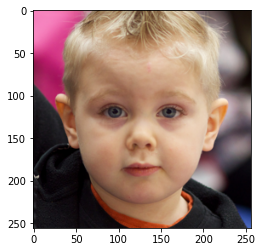

In [40]:
import tensorflow as tf
import numpy as np
from PIL import Image
from numpy import asarray
import os
import matplotlib.pyplot as plt

images = []

image = Image.open('./Small_sets/babiesv2/images/02081.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/04574.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/01821.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/00102.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/00402.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/09440.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/10390.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/07934.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/04944.png')
images.append(image)
image = Image.open('./Small_sets/babiesv2/images/06611.png')
images.append(image)

ims = []
for index in range(len(images)):
    ims.append(np.array(images[index].resize((256,256)))) #you can pass multiple arguments in single line
print(type(ims[0]))
plt.imshow(ims[0])
print(ims[0].shape)

def parse_single_image(image):
#   image = tf.transpose(image, (0, 1, 2))
  #define the dictionary -- the structure -- of our single example
  data = {
        'shape' : _int64_feature([image.shape[2],image.shape[0],image.shape[1]]),
        'data' : _bytes_feature(serialize_array(image)),
    }
  #create an Example, wrapping the single features
  out = tf.train.Example(features=tf.train.Features(feature=data))

  return out

def write_images_to_tfr_short(images, filename:str="babies"):
  filename= filename+".tfrecords"
  writer = tf.io.TFRecordWriter(filename) #create a writer that'll store our data to disk
  count = 0

  for index in range(len(images)):

    #get the data we want to write
    current_image = images[index] 

    out = parse_single_image(image=current_image)
    writer.write(out.SerializeToString())
    count += 1

  writer.close()
  print(f"Wrote {count} elements to TFRecord")
  return count

count = write_images_to_tfr_short(ims)
print(count)

In [11]:
import tensorflow as tf 

raw_dataset = tf.data.TFRecordDataset("babies.tfrecords")

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    print(example)
    example.ParseFromString(raw_record.numpy())
    print(example)


features {
  feature {
    key: "data"
    value {
      bytes_list {
        value: "\010\004\022\016\022\003\010\200\002\022\003\010\200\002\022\002\010\003\"\200\200\014\363}\271\362\177\271\361\200\270\362\201\271\362\201\271\362\202\271\362\201\271\362\201\271\363\202\272\362\202\271\362\202\270\362\202\271\363\203\272\364\202\272\363\202\270\362\202\270\363\202\270\362\201\271\363\201\270\363\201\270\362\200\266\362\200\267\361\177\267\362~\267\362}\265\361{\264\362{\265\361z\264\360y\262\361y\261\361x\261\362x\260\360w\256\360w\256\360v\255\360u\255\357u\254\355s\251\354r\250\353q\247\352q\245\350o\243\346n\242\346m\242\344k\236\343j\236\343i\235\340f\231\335c\227\334a\227\333`\227\327_\222\325a\220\323b\217\314e\213\314e\213\315`\215\315f\216\300{\213\303\202\222\304\211\227\307\224\237\302\211\227\306\202\226\310\205\231\307\212\234\313\220\240\310\217\237\305\237\244\256\221\210\234\206n\237\207r\237\213r\220v`\224ya\214pUjJ5iH3qO5\212gI\234|[\237\204_\244\212d\235}^\236}`\2

In [29]:
import tensorflow as tf 

raw_dataset = tf.data.TFRecordDataset("ffhq-r08.tfrecords")

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "data"
    value {
      bytes_list {
        value: "\000\000\001\000\000\000\000\000\003\001\001\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\000\000\000\000\000\001\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\001\000\000\000\001\000\001\001\000\000\000\000\000\000\000\000\000\001\002\001\003\002\005\007\005\t\005\007\004\t\005\007\t\t\005\005\007\007\014\005\007\014\010\n\010\n\013\017\n\t\n\003\017\005\006\006\003\005\001\000\000\000\000\000\000\000\000\000\000\000\000\000\004\016\027\"-)\036\035\036\030\032\034\033\036&6DYr\217\245\251\262\276\313\316\316\324\331\335\340\337\335\324\276\203+\006\006\004\002\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\0

In [17]:
import numpy as np
from PIL import Image
from numpy import asarray
import os
import tensorflow as tf 

def _parse_image_function(example_proto):
    features = tf.io.parse_single_example(example_proto)
    image = tf.io.decode_raw(features['image'], tf.uint8)
    image.set_shape([3 * 32 * 32])
    image = tf.reshape(image, [32, 32, 3])

    label = tf.cast(features['label'], tf.int32)
    label = tf.one_hot(label, 10)

    return image, label

def read_dataset(epochs, batch_size, path):

    filenames = [os.path.join(path + '.tfrecords')]
    dataset = tf.data.TFRecordDataset(filenames)

    featuress = {
        'data': tf.io.FixedLenFeature([], tf.string),
        'shape': tf.io.FixedLenFeature([], tf.int64),
    }

    dataset = dataset.map(_parse_image_function, num_parallel_calls=10)
    dataset = dataset.prefetch(10)
    dataset = dataset.repeat(epochs)
    dataset = dataset.shuffle(buffer_size=10 * batch_size)
    dataset = dataset.batch(batch_size, drop_remainder=True)

    return dataset

In [18]:
train_dataset = read_dataset(1, 10, 'babies')

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(50, 50))
    for n in range(100):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n] / 255.0)
        plt.axis("off")

image_batch, label_batch = next(iter(train_dataset))

show_batch(image_batch.numpy(), label_batch.numpy())

TypeError: in user code:

    /tmp/ipykernel_26021/4057299466.py:8 _parse_image_function  *
        features = tf.io.parse_single_example(example_proto)
    /home/nasseraa/.conda/envs/SBGMv2/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper  **
        return target(*args, **kwargs)

    TypeError: parse_single_example_v2() missing 1 required positional argument: 'features'


In [6]:
# newest method here

import tensorflow as tf
import os
import matplotlib.image as mpimg

class GenerateTFRecord:
    def __init__(self, labels):
        self.labels = labels

    def convert_image_folder(self, img_folder, tfrecord_file_name):
        # Get all file names of images present in folder
        img_paths = os.listdir(img_folder)
        img_paths = [os.path.abspath(os.path.join(img_folder, i)) for i in img_paths]

        with tf.io.TFRecordWriter(tfrecord_file_name) as writer:
            for img_path in img_paths:
                example = self._convert_image(img_path)
                writer.write(example.SerializeToString())

    def _convert_image(self, img_path):
        image_data = mpimg.imread(img_path)
        # Convert image to string data
        image_str = image_data.tostring()
        # Store shape of image for reconstruction purposes
        img_shape = image_data.shape
        # Get filename
        filename = os.path.basename(img_path)
        
        example = tf.train.Example(features = tf.train.Features(feature = {
        'shape' : _int64_feature([img_shape[2], img_shape[0], img_shape[1]]),
        'data' : tf.train.Feature(bytes_list = tf.train.BytesList(value = [image_str])),

        }))
        return example

if __name__ == '__main__':
    labels = {'cat': 0, 'dog': 1}
    t = GenerateTFRecord(labels)
    t.convert_image_folder('./Small_sets/babiesv2/images', 'newBabies.tfrecord')

/tmp/ipykernel_52360/3194667322.py:24: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  image_str = image_data.tostring()


In [11]:
import tensorflow as tf
import os
import shutil
import matplotlib.image as mpimg
import numpy as np

class TFRecordExtractor:
    def __init__(self, tfrecord_file):
        self.tfrecord_file = os.path.abspath(tfrecord_file)

    def _extract_fn(self, tfrecord):
        # Extract features using the keys set during creation
        features = {
            'shape': tf.io.FixedLenFeature([], tf.int64),
            'data': tf.io.FixedLenFeature([], tf.string)
        }

        # Extract the data record
        sample = tf.io.parse_single_example(tfrecord, features)

        image = tf.image.decode_image(sample['data'])        
        img_shape = tf.stack(sample['shape'])
        return [image, img_shape]        

    def extract_image(self):
        # Create folder to store extracted images
        folder_path = './ExtractedImages'
        shutil.rmtree(folder_path, ignore_errors = True)
        os.mkdir(folder_path)

        # Pipeline of dataset and iterator 
        dataset = tf.data.TFRecordDataset([self.tfrecord_file])
        dataset = dataset.map(self._extract_fn)
        iterator = dataset.make_one_shot_iterator()
        next_image_data = iterator.get_next()

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())

            try:
                # Keep extracting data till TFRecord is exhausted
                while True:
                    image_data = sess.run(next_image_data)

                    # Check if image shape is same after decoding
                    if not np.array_equal(image_data[0].shape, image_data[3]):
                        print('Image {} not decoded properly'.format(image_data[2]))
                        continue
                        
                    save_path = os.path.abspath(os.path.join(folder_path, image_data[2].decode('utf-8')))
                    mpimg.imsave(save_path, image_data[0])
                    print('Save path = ', save_path, ', Label = ', image_data[1])
            except:
                pass

if __name__ == '__main__':
    t = TFRecordExtractor('./newBabies.tfrecord')
    t.extract_image()

AttributeError: 'MapDataset' object has no attribute 'make_one_shot_iterator'